# Baseball Evaluation Project

# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.



Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Output: Number of predicted wins (W)



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
ds=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df=pd.DataFrame(ds)

In [3]:
df.head()
#top 5 rows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()
#last 5 rows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Checking Missing Values

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Let's plot the heatmap to see the null values

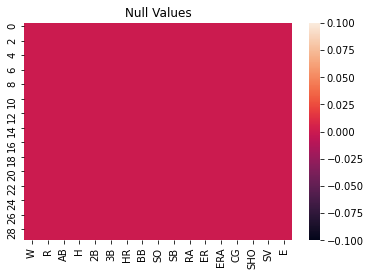

In [7]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in the dataset

In [8]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the variables are integer or float type.There is no categorical variable in this dataset.
So we do not need to use Label Encoder or One Hot encoder.

# Analysis of Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are total 16 variables in the dataset.One is output variable i.e. W, rest 15 are input variables.

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1) We have total 16 input variables, 1 output variable (W) and 30 rows in our dataset.


2) Some of the fields like SO,RA,ER,AB,R,H have very high standard deviation indicating that data is scattered.

# Plotting of data

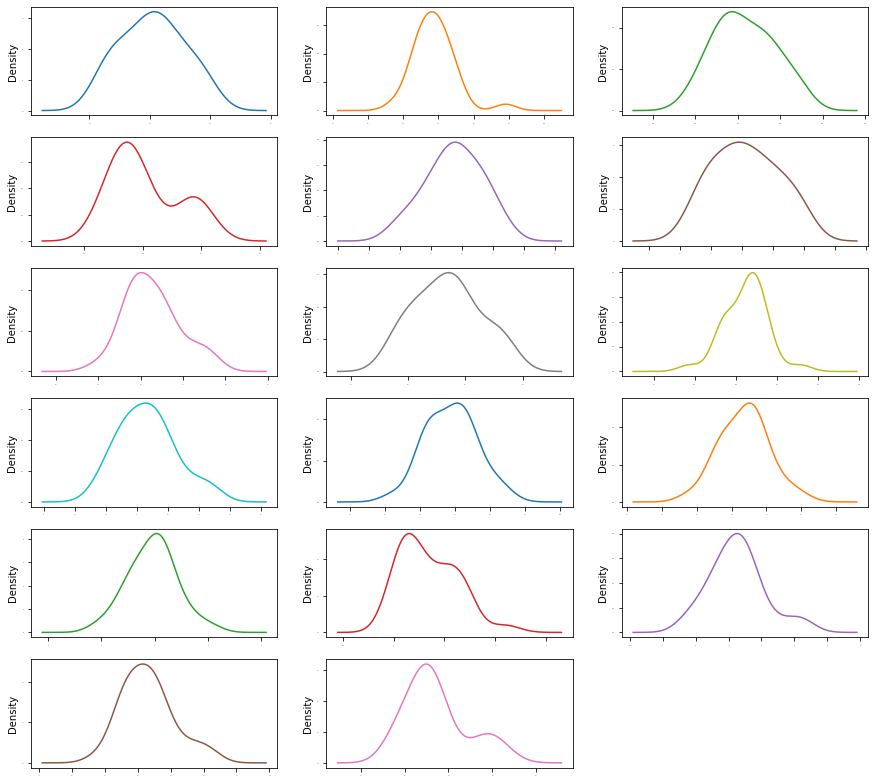

In [12]:
df.plot(kind='density',subplots=True,layout=(6,3),sharex=False, legend=False, fontsize=1,figsize=(15,14))
plt.show()

From the above plots, we can see that skewness is there in some of the columns in our dataset.We will be removing skewness in further steps.

# Pairplot

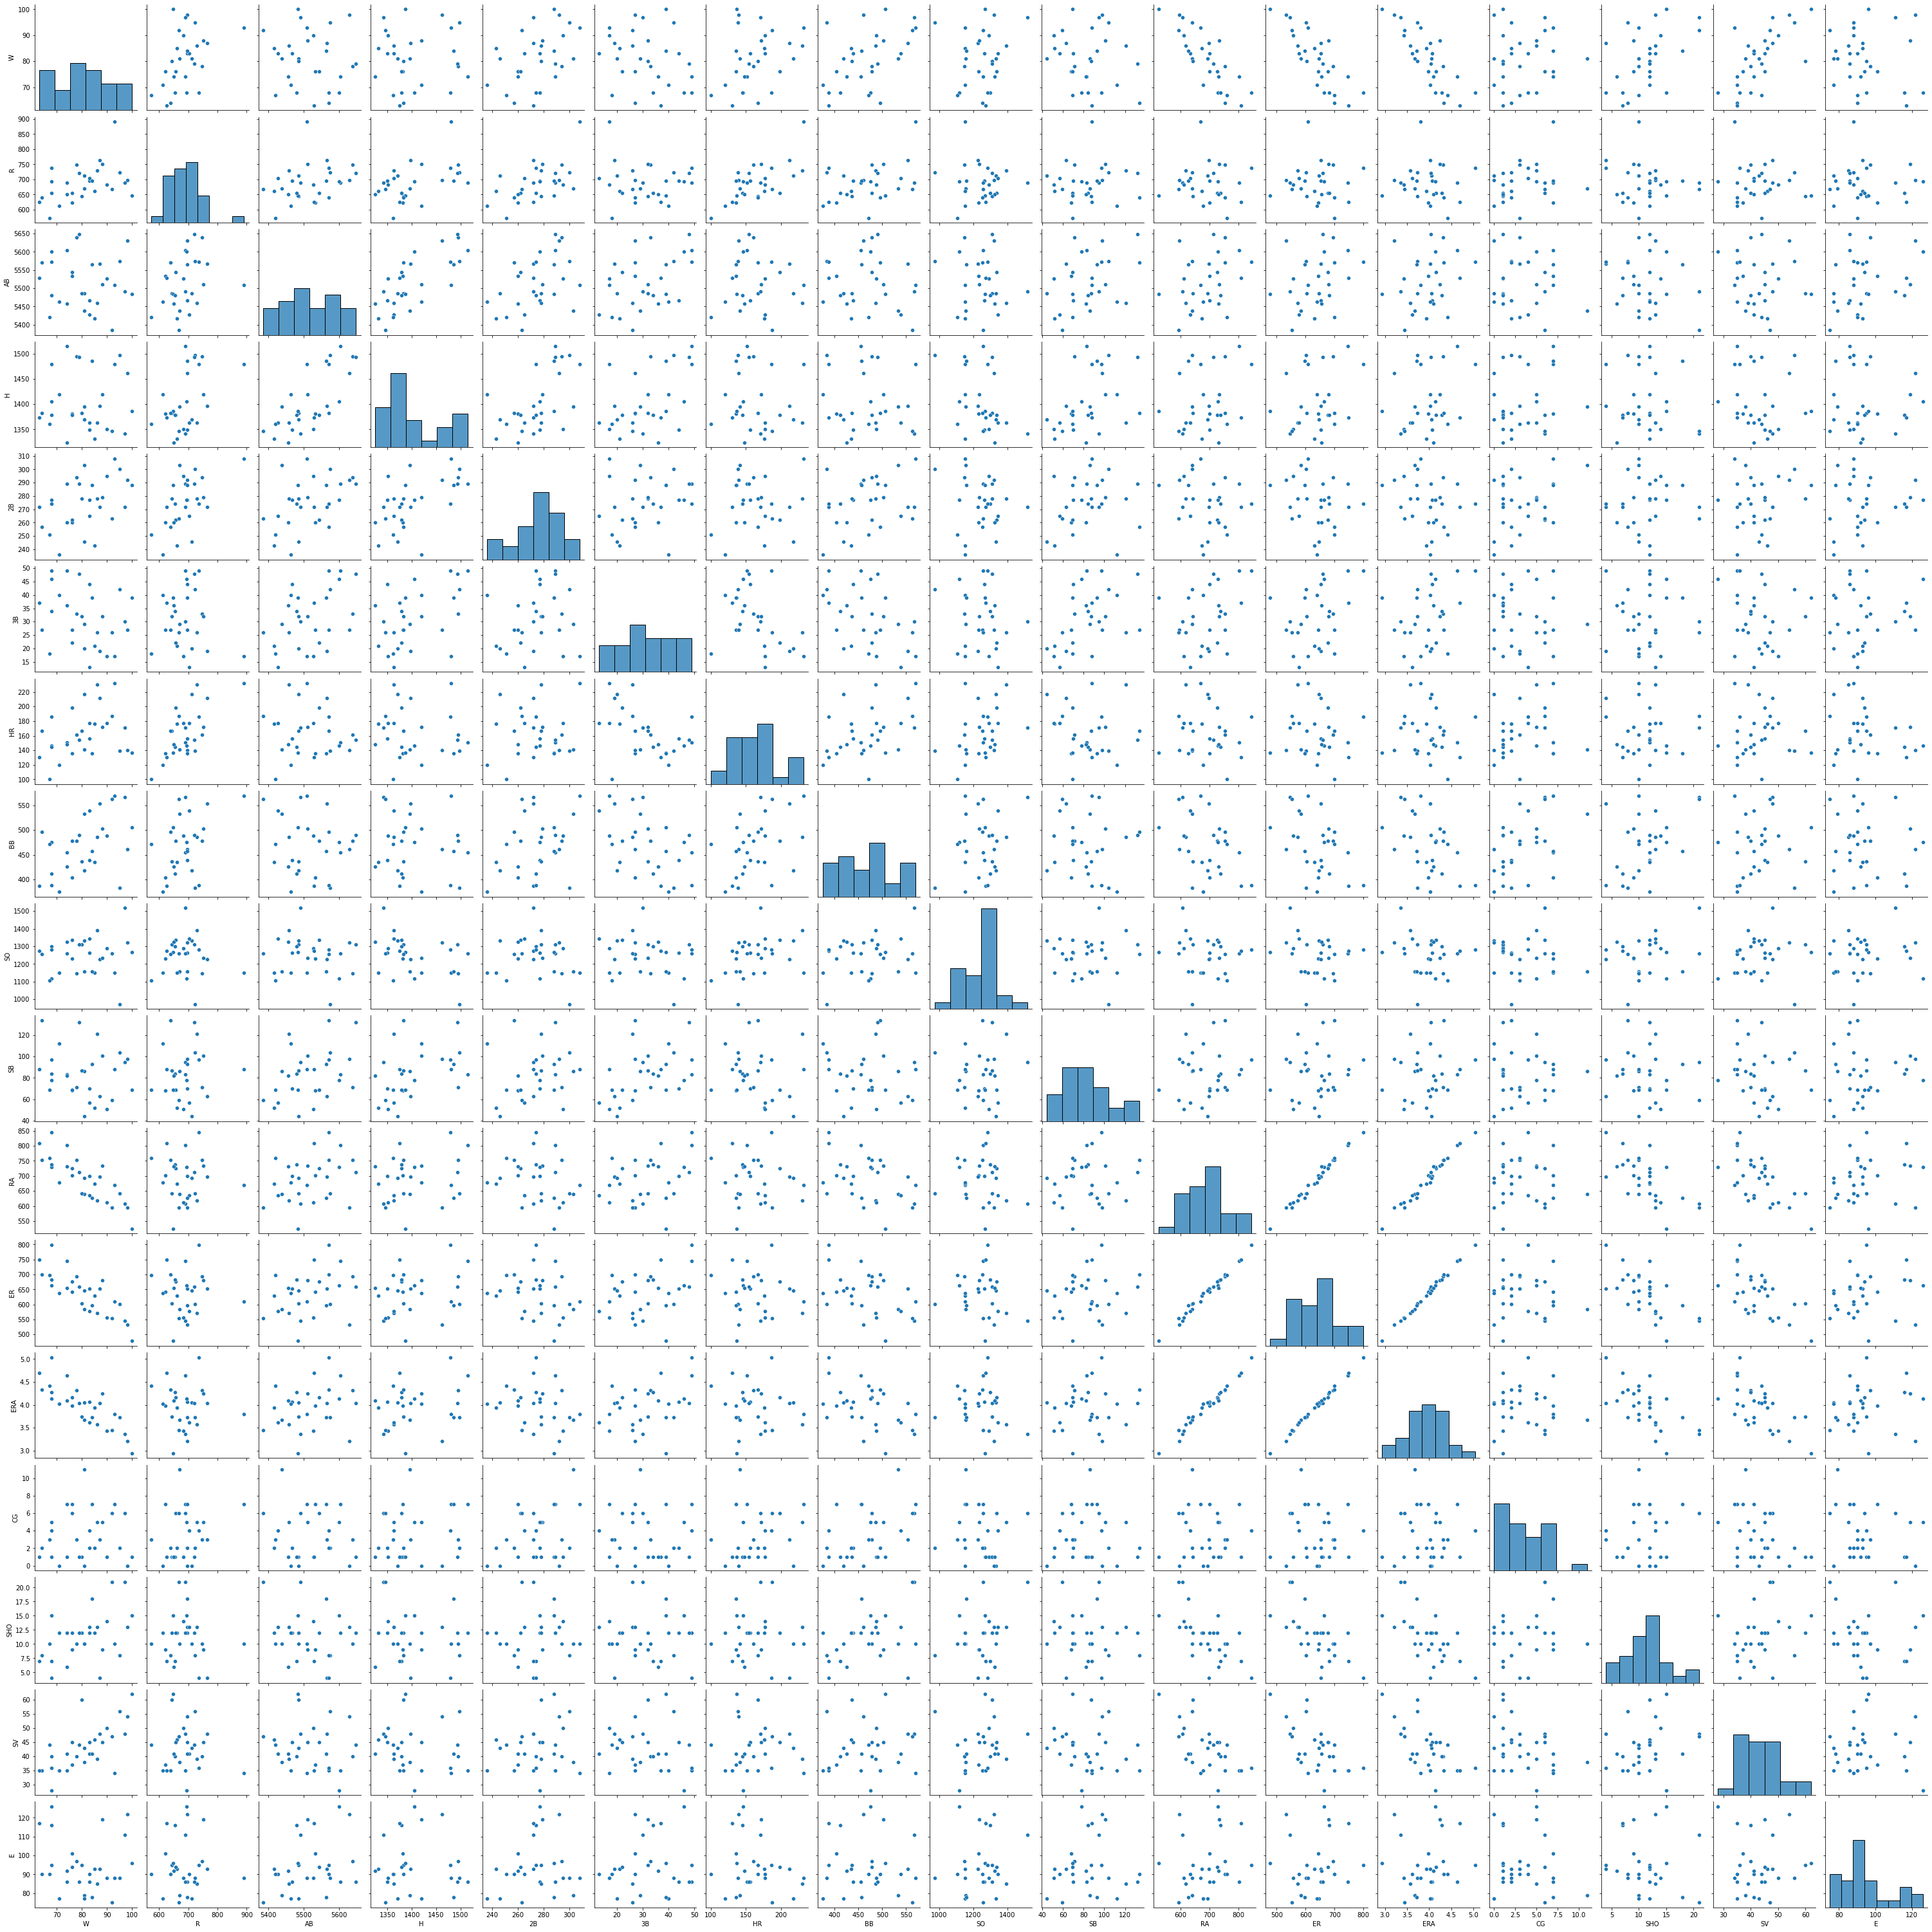

In [13]:
sns.pairplot(df)

The above graphs are difficult to read and interpret the relationship between different variables. Lets use correlation to find how they are related to each other.

# Checking Correlation

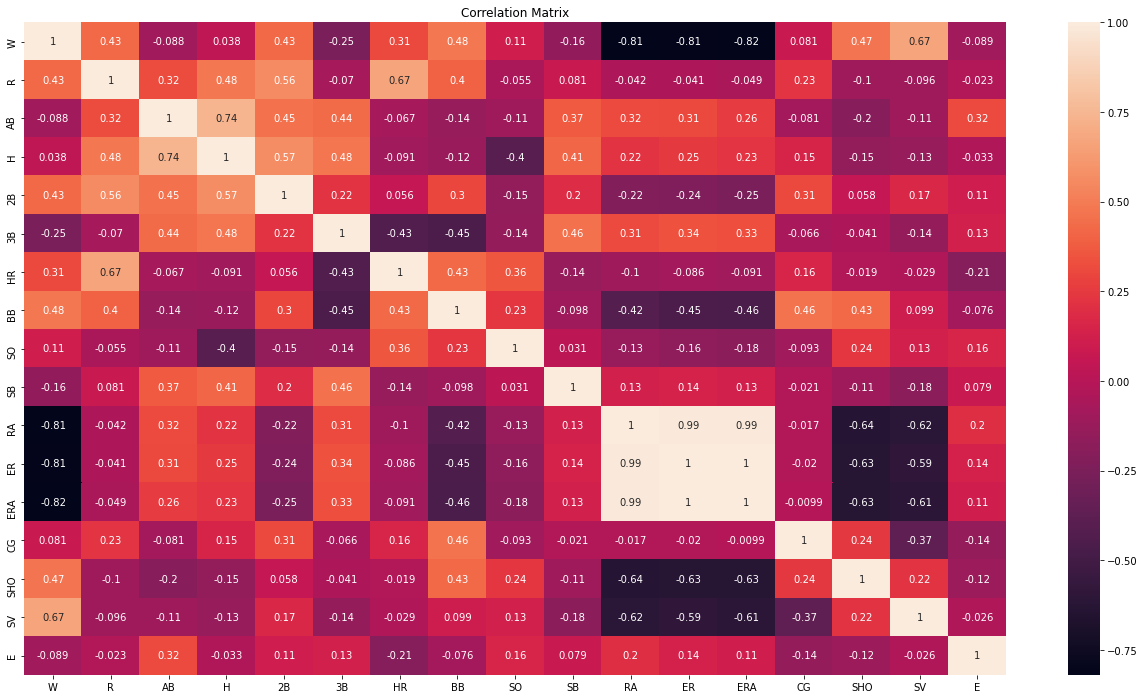

In [14]:
corr_mat=df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

1) The above matrix shows the correlation between different variables in the dataset including the target variables.

2) These correlation values can be positive or negative.

3) The positive values indicates the positive correlation and negative values indicates the negative correlation.

4) Positive values indicate that the value of one variable increases with increase in other variable.

5) Negative values indicate that the value of one variables decreases with increase in other variables.

6) The columns with very less correlation with the target variable can be dropped if required.

7) The columns'RA','ER'and'ERA' are most highly correlated with the target variable.


To see the relationship between each variable and target variable more clearly, we can follow below step.

In [15]:
corr_matrix=df.corr()
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

1) The above values show correlation of each variable with the target variables.

2) Some variables have positive correlation value while some have negative correlation values.

3) ER,RA,ERA are most highly correlated with the target variables.

4) H,CG,AB and E least correlated with the target variables.

# Checking Outliers

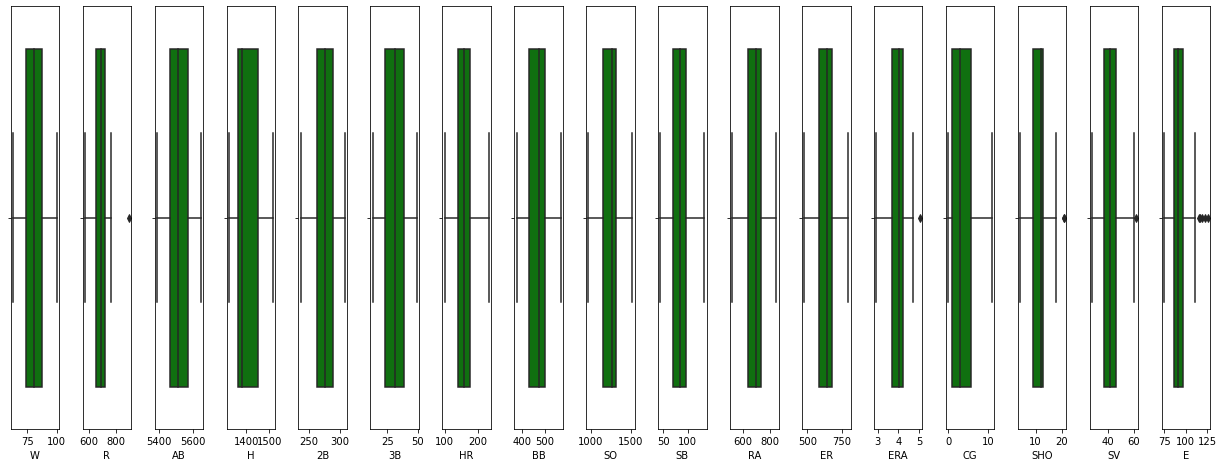

In [16]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

<AxesSubplot:>

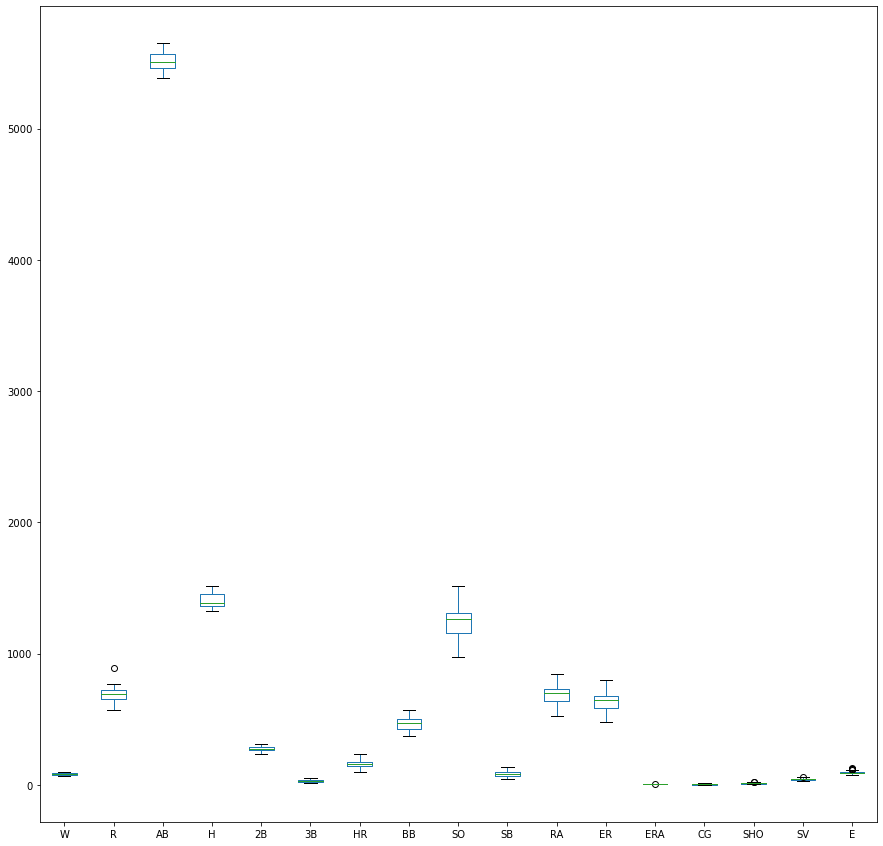

In [17]:
#another way for plotting boxplots
df.plot(kind='box',layout=(6,3), figsize=(15,15),widths=0.5)

There are outliers present in some columns in the dataset.

Lets check the zscore of each variable in our dataset and remove the outliers having zscore value greater than 3.

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [19]:
df[(z>3).all(axis=1)]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


We can see that there are no outliers having zscore value greater than the threshold value 3. So we are not removing them.

# Removing Skewness

1) Skewness indicates the asymmetry in the probability distribution in our dataset.

2) Skewness exists when the distribution curve is disorted or asymmetrical,meaning that there are more data points on one side of the median than on the other.

3) Many models do not work well if there is skewness as the tall tail acts as outliers in this case.

In [20]:
x=df.drop('W',axis=1)
y=df['W']

In [21]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [22]:
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

We can see that skewness is high in some of the columns like CG,SHO,SV and E.So we will be using Power transform to remove the outliers.

In [23]:
x['CG']

0      2
1      2
2     11
3      7
4      7
5      7
6      3
7      0
8      1
9      3
10     5
11     5
12     2
13     6
14     5
15     1
16     0
17     6
18     1
19     2
20     1
21     4
22     0
23     3
24     1
25     6
26     7
27     1
28     1
29     4
Name: CG, dtype: int64

We cannot apply boxcox transformation to remove skewness as there are zero values in this column and boxcox works on strictly positive values.

So we will be using yeo transformation in this case.

In [27]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=False)
x_new=pt.fit_transform(x)


In [31]:
x_trans=pd.DataFrame(x_new,columns=x.columns)


In [32]:
x_trans.skew()


R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.000000
dtype: float64

In [33]:
x_trans

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.120387,0.120387,0.120387,336128.055182,14.633107,5.146456,11.744734,21714.771712,8.370123,228.934244,229.612644,3.160220,1.261954,4.033641,2.310585,0.503759
1,0.120387,0.120387,0.120387,278151.529845,15.090944,5.270805,12.219198,32234.374951,7.270817,245.889490,245.820118,3.418248,1.261954,5.263553,2.246884,0.503756
2,0.120387,0.120387,0.120387,344162.322895,11.423265,5.161834,12.917532,28204.491625,7.829348,228.644361,224.259881,3.114357,3.429637,4.676362,2.194886,0.503743
3,0.120387,0.120387,0.120387,239337.240000,10.884646,5.122978,11.928714,30972.162119,7.194376,246.174450,242.721975,3.350247,2.717248,4.362947,2.186461,0.503775
4,0.120387,0.120387,0.120387,307606.040696,16.202133,5.235664,12.345921,32042.036103,7.731019,274.853567,274.241844,3.844231,2.717248,5.263553,2.168705,0.503756
5,0.120387,0.120387,0.120387,357798.098947,7.924496,5.700955,13.165763,27983.948372,7.893462,237.303865,232.122095,3.213600,2.717248,4.676362,2.159336,0.503759
6,0.120387,0.120387,0.120387,266383.828233,8.559676,5.602927,13.060033,30820.328498,6.995536,245.319336,245.510691,3.388052,1.652938,2.486740,2.266094,0.503766
7,0.120387,0.120387,0.120387,209885.203155,8.867941,5.628258,12.047208,34848.948642,6.109238,243.892582,243.652326,3.403155,0.000000,4.676362,2.233142,0.503739
8,0.120387,0.120387,0.120387,280540.539865,12.205654,5.344391,12.195032,34022.047360,7.861545,229.224041,230.554391,3.167854,0.755958,5.263553,2.329874,0.503768
9,0.120387,0.120387,0.120387,320388.768662,12.460222,5.304862,12.522050,27873.896524,7.308418,260.888195,258.434612,3.598572,1.652938,4.676362,2.210919,0.503771


# Finding the best random state

In [34]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_trans,y,test_size=.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=LR.score(x_train,y_train)
    acc=acc*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
    print('Best accuracy is',maxAccu, 'on random state ',maxRS)
    

Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 95.24750802413382 on random state  0
Best accuracy is 96.79434300354718 on random state  11
Best accuracy is 96.79434300354718 on random state  11
Best accuracy is 96.79434300354718 on random state  11
Best accuracy is 96.79434300354718 on random state  11
Best accuracy is 96.79434300354718 on random state  11
Best accuracy is 97.0885473867216 on random state  16
Best accuracy is 97.0885473867216 on random state  16
Best accuracy is 97.088

Best accuracy is  98.3728693687895 on random state  31


# Finding the best fit model

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=31)

from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

model_reg = [RandomForestRegressor(), SVR(), DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(normalize=True),Ridge(alpha=0.05,normalize=True)]
df_result=pd.DataFrame(columns=['Model','Score','Mean Absolute Error','RMSE','R2 Score'])


for model in model_reg:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=m.score(x_train,y_train)
    acc_final=acc
    print('Score: ', acc_final)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=5, scoring="neg_mean_squared_error")))
    r2_scr=r2_score(y_test,pred)
    #scr=cross_val_score(m,x,y,cv=5,scoring)
    #scr=np.sqrt(np.abs(scr['test_score']))
    #scr_final=np.mean(scr)
    #scr_final=scr.mean()
    print('RMSEe: ',rmse)
    #diff=(acc_final-scr_final)
    mean_abs_error=mae(y_test,pred)
    #print('Difference between cross validation score and accuracy is ', diff)
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Score':acc_final,'Mean Absolute Error':mean_abs_error,'RMSE':rmse,'R2 Score':r2_scr}, ignore_index=True)

print(df_result)
    

Model:  RandomForestRegressor()
Score:  0.9463852079158317
RMSEe:  10.386162642441743
------------------------------------------------
Model:  SVR()
Score:  -0.015902513102087568
RMSEe:  9.641347509295619
------------------------------------------------
Model:  DecisionTreeRegressor()
Score:  1.0
RMSEe:  14.43927348260973
------------------------------------------------
Model:  KNeighborsRegressor()
Score:  0.5971492985971942
RMSEe:  8.497992862621922
------------------------------------------------
Model:  LinearRegression(normalize=True)
Score:  0.9958056949429392
RMSEe:  6.956055948671685
------------------------------------------------
Model:  Ridge(alpha=0.05, normalize=True)
Score:  0.9796414097918363
RMSEe:  7.677501738066468
------------------------------------------------
                               Model     Score  Mean Absolute Error  \
0            RandomForestRegressor()  0.946385             6.391111   
1                              SVR() -0.015903             7.43964

In [36]:
df_result

,Model,Score,Mean Absolute Error,RMSE,R2 Score
0,RandomForestRegressor(),0.946385,6.391111,10.386163,0.393572
1,SVR(),-0.015903,7.439644,9.641348,-0.123378
2,DecisionTreeRegressor(),1.000000,6.444444,14.439273,0.302779
3,KNeighborsRegressor(),0.597149,5.822222,8.497993,0.258924
4,LinearRegression(normalize=True),0.995806,5.841517,6.956056,0.318845
5,"Ridge(alpha=0.05, normalize=True)",0.979641,4.668402,7.677502,0.484306


1) The best possible value for score in linear regression is 1.we have to choose the model which is more closer to 1.

2) Mean absolute Error indicates the difference between the real value and the predict value. So it should be minimum.

3) Root Mean Squared Error (RMSE) is square root of the variance,which indicates how close observed data points are to the predicted data points.So it should be also minimum for a good fit model.

4) R2 score indicates the goodness of fit for a model.So higher the R score of model,better the performance.

Now,we can see in the above dataframe that Ridge Regression is the best fit model for this dataset as it has maximum score and R2 score value(closer to 1)and with least RMSE.

# Finalizing the Model

In [37]:
#Random Forest is our best fit model.
rr = Ridge()
rr.fit(x_train , y_train)
rr.score(x_train , y_train)

0.9870596117323427

In [38]:
y_pred = rr.predict(x_test)

In [39]:
print("Predicted result: ",y_pred)
print("Actual result :", y_test)

Predicted result:  [ 95.98731613  63.01940644  89.74017863  82.29145278 101.66981941
  85.4456075   97.59173861  85.75583016  79.28730961]
Actual result : 8      80
22     71
5      93
7      81
15    100
13     76
0      95
26     84
9      78
Name: W, dtype: int64


In [40]:
#r2 score --> co-efficient of determination' is the proportion of the variance in the dependent variable that is predictable 
#from the independent variable(s). i.e. Change in y when x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))


0.48430610834511245


# Hyper Parameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}

In [43]:
GCV=GridSearchCV(Ridge(),params_Ridge,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False]})

In [44]:
GCV.best_params_#printing the best parameters found by GridSearchCV

{'alpha': 0.0001, 'fit_intercept': False}

In [46]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [47]:
GCV.score(x_train,y_train)

0.9915430803438854

Now we have got the best parameter using Grid Search CV,lets make the final model using these parameter.

In [49]:
ridge = Ridge(alpha=0.0001,fit_intercept=True)
ridge.fit(x_train , y_train)
ridge.score(x_train , y_train)


0.9957864208642716

We have achieved accuracy of 99.5% in our final model.

In [50]:
import joblib
joblib.dump(ridge,'Baseball.obj')

['Baseball.obj']

# Loading the Model

In [51]:
mod = joblib.load("Baseball.obj")

In [52]:
print(mod.predict(x_test))


[92.62901385 58.94728167 97.18065265 80.50018158 95.01470533 88.05786815
 93.77093021 82.10318621 79.74103201]
